**Question 5: Kaggle Food Delivery**

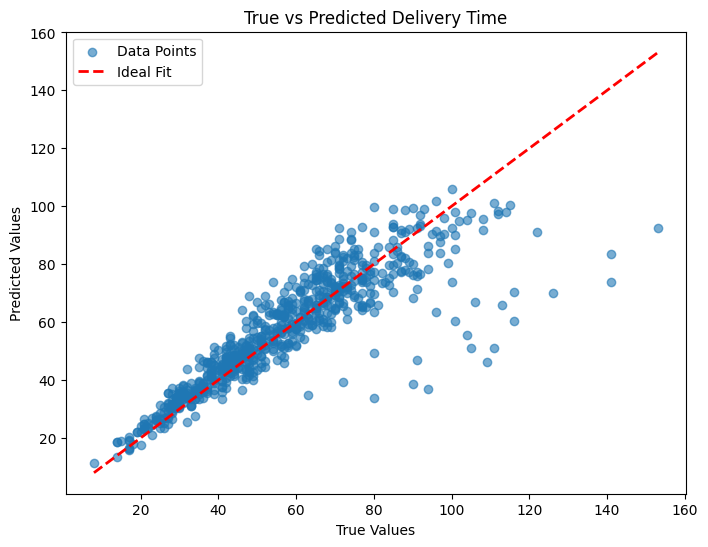

RMSE of linear regression model with all features using calculated Hat Matrix: 11.12


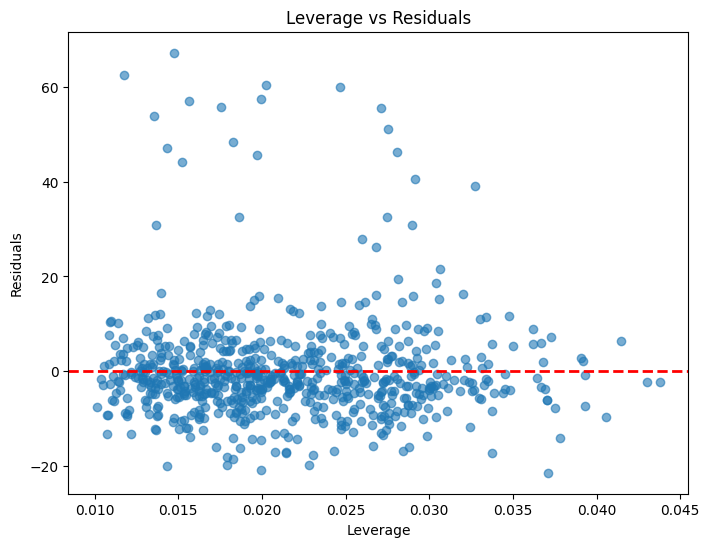

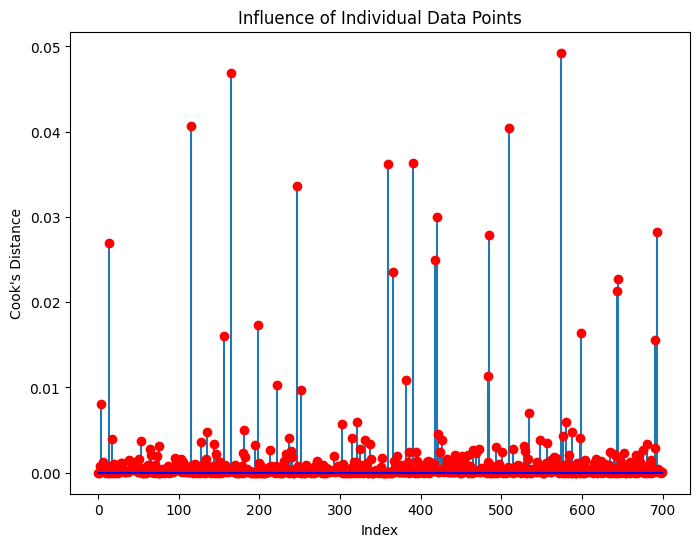

Explanation:
Residuals indicate how much each data point deviates from the model's predicted values.
High leverage points have unusual predictor values, meaning they have the potential to influence the regression line significantly.
Cook's Distance measures overall influence by combining residuals and leverage. High values indicate points that significantly affect the model.
The data point at index 574 has the highest influence.
Leverage: 0.0247, Residual: 59.9584, Cook's Distance: 0.0493
If this point is removed, the regression results might change significantly.
High leverage points (indices): [249 301]


In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the train and test datasets
train_path = "deliverytimeprediction_train.csv"
test_path = "deliverytimeprediction_test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Separate features (X) and target (y) for training
X_train = train_df.drop(columns=['Delivery_Time_min'])
y_train = train_df['Delivery_Time_min']

# Separate features (X) for testing (we don't have y_test)
X_test = test_df.drop(columns=['Delivery_Time_min'], errors='ignore')

# Convert boolean columns to integer (0 or 1)
X_train = X_train.astype(int)
X_test = X_test.astype(int)

# Add intercept for linear regression
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit linear regression model
model = sm.OLS(y_train, X_train).fit()

# Compute beta coefficients
beta_hat = model.params.values

# Compute Hat matrix H = X(X'X)^(-1)X'
X_matrix = X_train.values
H = X_matrix @ np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T

# Compute leverage values (diagonal elements of H)
leverage = np.diag(H)

# Compute residuals
residuals = model.resid

# Predict values for training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Store computed values in a DataFrame
computed_values_df = pd.DataFrame({
    'Leverage': leverage,
    'Residuals': residuals,
    'Predicted Values (Train)': y_train_pred
})

# Plot True vs. Predicted Values (Train)
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6, label="Data Points")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle="--", lw=2, label="Ideal Fit")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Delivery Time")
plt.legend()
plt.show()

# Compute RMSE using the predicted values from the True vs Predicted graph
rmse_graph_based = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Display the final RMSE result
print(f"RMSE of linear regression model with all features using calculated Hat Matrix: {rmse_graph_based:.2f}")

# Plot Leverage vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(leverage, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle="--", lw=2)
plt.xlabel("Leverage")
plt.ylabel("Residuals")
plt.title("Leverage vs Residuals")
plt.show()

# Analyze influence and residuals
influence = model.get_influence()
cooks_distance, _ = influence.cooks_distance

# Plot Cook's Distance
plt.figure(figsize=(8, 6))
plt.stem(range(len(cooks_distance)), cooks_distance, markerfmt="ro", basefmt="b-")
plt.xlabel("Index")
plt.ylabel("Cook's Distance")
plt.title("Influence of Individual Data Points")
plt.show()

# Explanation of influence and residuals
print("Explanation:")
print("Residuals indicate how much each data point deviates from the model's predicted values.")
print("High leverage points have unusual predictor values, meaning they have the potential to influence the regression line significantly.")
print("Cook's Distance measures overall influence by combining residuals and leverage. High values indicate points that significantly affect the model.")

# Example
max_influence_index = np.argmax(cooks_distance)
print(f"The data point at index {max_influence_index} has the highest influence.")
print(f"Leverage: {leverage[max_influence_index]:.4f}, Residual: {residuals[max_influence_index]:.4f}, Cook's Distance: {cooks_distance[max_influence_index]:.4f}")
print("If this point is removed, the regression results might change significantly.")

# List of leverage points
high_leverage_threshold = 2 * X_train.shape[1] / X_train.shape[0]
high_leverage_points = np.where(leverage > high_leverage_threshold)[0]
print("High leverage points (indices):", high_leverage_points)